In [85]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
from shapely.geometry import Polygon


In [86]:
raw_data=gpd.read_file('states.shp')
raw_data.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot:>

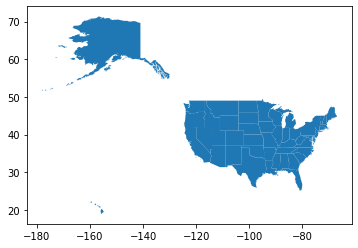

In [87]:
raw_data.plot()

<AxesSubplot:>

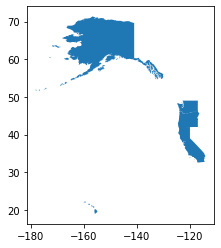

In [88]:
raw_data[raw_data.SUB_REGION=='Pacific'].plot()

### Reading CSV files to get the co-ordinates
<li> DataFrame + Geometry = GeoPandas
<li> Tell GeoPandas new Co-ordinate from csv files

In [89]:
solar_raw_data=pd.read_csv('CDM_IND_solar.csv',sep='\t')
solar_raw_data.head()

,Plant,Latitude,Longitude,ID,Capacity (MW),WRI ID
0,Greenhouse Gas Emission Reductions Through The...,26.78777,72.00939,CDMDB0009293,125.0,1020240.0
1,Greenhouse Gas Emission Reductions Through Pho...,26.80360,72.00710,CDMDB0007103,100.0,NaN
2,50 MW Solar Photo Voltaic Plant at Rajgarh (MP),23.96260,76.72230,CDMDB0010270,50.0,NaN
3,Solar Thermal Power Plant by Godawari Green En...,27.60361,72.23589,CDMDB0007379,50.0,NaN
4,Adani Enterprises Limited Solar PV Power Proje...,23.26280,69.02420,CDMDB0005928,40.0,NaN


In [90]:
solar_raw_data.describe()

,Latitude,Longitude,Capacity (MW),WRI ID
count,92.000000,92.000000,119.000000,1.0
mean,23.543191,73.295193,11.512101,1020240.0
std,4.086052,3.756617,16.056218,NaN
min,9.803200,68.993200,0.540000,1020240.0
25%,22.364925,71.200000,5.000000,1020240.0
50%,23.869500,72.005275,5.000000,1020240.0
75%,27.361140,74.299650,11.720000,1020240.0
max,28.570000,92.700000,125.000000,1020240.0


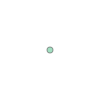

In [91]:
Point([1,40])

In [108]:
Points([40,40])

TypeError: 'Series' object is not callable

In [111]:
Points=solar_raw_data.apply(lambda row:Point(row.Longitude,row.Latitude),axis=1 )
Points.head()

/home/sk/anaconda3/envs/GEO/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0            POINT (72.00939 26.78777)
1    POINT (72.00709999999999 26.8036)
2              POINT (76.7223 23.9626)
3            POINT (72.23589 27.60361)
4    POINT (69.02419999999999 23.2628)
dtype: object

In [99]:
import numpy as np

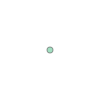

In [109]:
Points[0]

In [112]:
Solar_data=gpd.GeoDataFrame(solar_raw_data,geometry=Points)
Solar_data.crs={'init': 'epsg:4326'}

/home/sk/anaconda3/envs/GEO/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [113]:
Solar_data.head()

,Plant,Latitude,Longitude,ID,Capacity (MW),WRI ID,geometry
0,Greenhouse Gas Emission Reductions Through The...,26.78777,72.00939,CDMDB0009293,125.0,1020240.0,POINT (72.00939 26.78777)
1,Greenhouse Gas Emission Reductions Through Pho...,26.80360,72.00710,CDMDB0007103,100.0,NaN,POINT (72.00710 26.80360)
2,50 MW Solar Photo Voltaic Plant at Rajgarh (MP),23.96260,76.72230,CDMDB0010270,50.0,NaN,POINT (76.72230 23.96260)
3,Solar Thermal Power Plant by Godawari Green En...,27.60361,72.23589,CDMDB0007379,50.0,NaN,POINT (72.23589 27.60361)
4,Adani Enterprises Limited Solar PV Power Proje...,23.26280,69.02420,CDMDB0005928,40.0,NaN,POINT (69.02420 23.26280)


<AxesSubplot:>

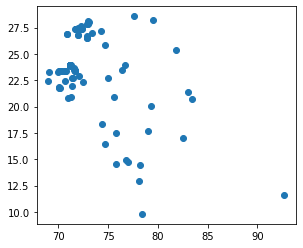

In [114]:
Solar_data.plot()